# TP 4 : Analyse morphologique & POS (Morphosyntaxique)

 **Partie I :**

In [1]:
import spacy

taln = spacy.load("en_core_web_sm")

**2.Qu'est-ce qu'un modèle de langue ?**

Un modèle de langue est un outil informatique utilisé dans le traitement automatique du langage naturel (TALN) pour comprendre et générer du langage humain.

Il est construit à partir de techniques statistiques, linguistiques et informatiques pour attribuer des probabilités à des séquences de mots ou de caractères dans une langue donnée.

In [7]:
text="we like to play football. Ihated it in my childhood though"

#Transformer le texte en un objet
# Transform the text into a Doc object
doc = taln(text)

# Print the type of the Doc object
type(doc)

spacy.tokens.doc.Doc

**4. Analyse Lexical : Morphologique**

In [14]:
for word in doc:
  print(f'{word.text:{12}}{word.morph}')

we          Case=Nom|Number=Plur|Person=1|PronType=Prs
like        Tense=Pres|VerbForm=Fin
to          
play        VerbForm=Inf
football    Number=Sing
.           PunctType=Peri
Ihated      Tense=Past|VerbForm=Fin
it          Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs
in          
my          Number=Sing|Person=1|Poss=Yes|PronType=Prs
childhood   Number=Sing
though      


In [16]:
import pandas as pd
# Initialiser une liste pour stocker les informations morphologiques sur le nombre
# Créer une liste de dictionnaires contenant les informations morphologiques pour chaque token
donnees_tokens = []
for token in doc:
    donnees_tokens.append({
        'Texte': token.text,
        'Nombre': token.morph.get('Number', 'N/A')  # Obtenir l'information sur le nombre, sinon 'N/A'
    })

# Créer un DataFrame à partir de la liste de dictionnaires
df = pd.DataFrame(donnees_tokens)

# Afficher le DataFrame
print(df)



        Token  Nombre
0          we  [Plur]
1        like     N/A
2          to     N/A
3        play     N/A
4    football  [Sing]
5           .     N/A
6      Ihated     N/A
7          it  [Sing]
8          in     N/A
9          my  [Sing]
10  childhood  [Sing]
11     though     N/A


In [ ]:

# Initialiser une liste pour stocker les informations morphologiques sur le nombre
donnees_morphologiques = []

# Parcourir chaque token dans l'objet Doc
for token in doc:
    # Extraire toutes les informations morphologiques pour chaque token
    morph_info = token.morph.to_dict()

    # Construire une chaîne contenant toutes les informations morphologiques
    morph_string = ', '.join([f"{key}: {value}" for key, value in morph_info.items()])
    #'.join(...) : join est utilisée pour combiner toutes les chaînes de caractères générées dans l'étape précédente en une seule grande chaîne.

    # Ajouter les informations morphologiques à la liste
    donnees_morphologiques.append({'Token': token.text, 'Analyse morphologique': morph_string})

# Créer un DataFrame à partir de la liste des informations morphologiques
df = pd.DataFrame(donnees_morphologiques)

# Afficher le DataFrame
print(df)

        Token                              Analyse morphologique
0          we  Case: Nom, Number: Plur, Person: 1, PronType: Prs
1        like                         Tense: Pres, VerbForm: Fin
2          to                                                   
3        play                                      VerbForm: Inf
4    football                                       Number: Sing
5           .                                    PunctType: Peri
6      Ihated                         Tense: Past, VerbForm: Fin
7          it  Case: Acc, Gender: Neut, Number: Sing, Person:...
8          in                                                   
9          my  Number: Sing, Person: 1, Poss: Yes, PronType: Prs
10  childhood                                       Number: Sing
11     though                                                   


**Analyse Morphosyntaxique (POS)**

l’information morphosyntaxique, l’étiquette ainsi que
l’explication de cette étiquette.

In [ ]:
# Display morphosyntactic information for each token
for token in doc:
    print(f"{token.text}:")
    print(f"- Part of speech: {token.pos_}")
    print(f"- Tag: {token.tag_}")
    print(f"- Explanation: {spacy.explain(token.tag_)}")
    print()

we:
- Part of speech: PRON
- Tag: PRP
- Explanation: pronoun, personal

like:
- Part of speech: VERB
- Tag: VBP
- Explanation: verb, non-3rd person singular present

to:
- Part of speech: PART
- Tag: TO
- Explanation: infinitival "to"

play:
- Part of speech: VERB
- Tag: VB
- Explanation: verb, base form

football:
- Part of speech: NOUN
- Tag: NN
- Explanation: noun, singular or mass

.:
- Part of speech: PUNCT
- Tag: .
- Explanation: punctuation mark, sentence closer

Ihated:
- Part of speech: VERB
- Tag: VBD
- Explanation: verb, past tense

it:
- Part of speech: PRON
- Tag: PRP
- Explanation: pronoun, personal

in:
- Part of speech: ADP
- Tag: IN
- Explanation: conjunction, subordinating or preposition

my:
- Part of speech: PRON
- Tag: PRP$
- Explanation: pronoun, possessive

childhood:
- Part of speech: NOUN
- Tag: NN
- Explanation: noun, singular or mass

though:
- Part of speech: ADV
- Tag: RB
- Explanation: adverb



**Exercice 2 :**

**L'étiquetage morphosyntaxique, ou POS tagging**

  Il consiste à attribuer à chaque mot d'une phrase une étiquette correspondant à sa catégorie grammaticale ou à sa fonction dans la phrase. Cette tâche est essentielle pour comprendre la structure grammaticale des phrases, ce qui facilite la compréhension globale du sens.

In [28]:
import spacy

# Charger le modèle de langue anglaise
taln = spacy.load("en_core_web_sm")

# Définir les phrases
phrases = [
    "Can you google it?",
    "Can you search it on google?"
]

# Analyser chaque phrase et afficher l'étiquette morphosyntaxique du mot "google"
for phrase in phrases:
    doc = taln(phrase)
    for token in doc:
        if token.text == "google":
            print(f"Phrase: {phrase}")
            print(f"Mot: {token.text}, POS_TAG: {token.tag_}\n")


Phrase: Can you google it?
Mot: google, POS_TAG: VB

Phrase: Can you search it on google?
Mot: google, POS_TAG: NNP



In [34]:
# Définir les phrases
phrase1 = "Can you google it?"
phrase2 = "Can you search it on google?"
# Fusionner les deux phrases
phrases_fusionnees = phrase1 + " " + phrase2
doc = taln(phrases_fusionnees)
# Utiliser la méthode count_by pour compter les occurrences de chaque étiquette POS
occurrences_pos = doc.count_by(spacy.attrs.POS)

In [ ]:
# Afficher le nombre d'occurrences de chaque étiquette POS avec leurs étiquettes
for pos_id, count in occurrences_pos.items():
    pos_label = doc.vocab[pos_id].text
    print(f"{pos_id}. {pos_label} : {count}")

87. AUX : 2
95. PRON : 4
100. VERB : 2
97. PUNCT : 2
85. ADP : 1
96. PROPN : 1


In [36]:
from spacy import displacy

# Visualiser les étiquettes POS et leurs dépendances
displacy.render(doc, style="dep", jupyter=True)


**"nsubj"**  signifie sujet nominal utilisée pour marquer la relation entre un verbe et son sujet.

**"dobj"** objet direct qui indique l'objet direct d'un verbe dans une phrase

**"aux"** auxiliaire "Can" est un verbe auxiliaire qui modifie le verbe principal "google".

**"prep"**  preposition entre deux mots, cela signifie que le premier mot est une préposition qui est suivie d'un complément introduit par cette préposition.

**"pobj"** objet de préposition "pobj" entre deux mots, cela signifie que le premier mot est un objet de la préposition représentée par le deuxième mot.
ce qui indique que "google" est l'objet de la préposition "on"

# Partie 2

In [38]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [47]:
df = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv')

In [48]:
def pos_tagging(review_text):
    tokens = word_tokenize(str(review_text))
    pos_tags = pos_tag(tokens)
    return pos_tags

In [ ]:
# Sélectionner un sous-ensemble de 10 000 avis
df_subset = df.head(10000)
df_subset = df_subset.copy()  # Crée une copie explicite du DataFrame
# Appliquer la fonction de balisage POS à chaque révision du sous-ensemble
df_subset['POS_tags'] = df_subset['Review Text'].apply(pos_tagging)

In [ ]:
df_subset['POS_tags']

0       [(Absolutely, RB), (wonderful, JJ), (-, :), (s...
1       [(Love, VB), (this, DT), (dress, NN), (!, .), ...
2       [(I, PRP), (had, VBD), (such, JJ), (high, JJ),...
3       [(I, PRP), (love, VBP), (,, ,), (love, VBP), (...
4       [(This, DT), (shirt, NN), (is, VBZ), (very, RB...
                              ...                        
9995    [(This, DT), (dress, NN), (is, VBZ), (quite, R...
9996    [(Love, VB), (this, DT), (dress, NN), (!, .), ...
9997    [(The, DT), (cut, NN), (is, VBZ), (perfect, JJ...
9998    [(I, PRP), (love, VBP), (this, DT), (shirt, NN...
9999    [(I, PRP), (adore, VBP), (this, DT), (top, JJ)...
Name: POS_tags, Length: 10000, dtype: object

In [ ]:
# Créer une liste vide pour stocker les étiquettes POS
all_pos_tags = []

# Parcourir chaque ligne du DataFrame
for tags in df_subset['POS_tags']:
    # Parcourir chaque paire (mot, étiquette POS) dans les tags de chaque ligne
    for  _,tag in tags:
        # Ajouter l'étiquette POS à la liste
        all_pos_tags.append(tag)


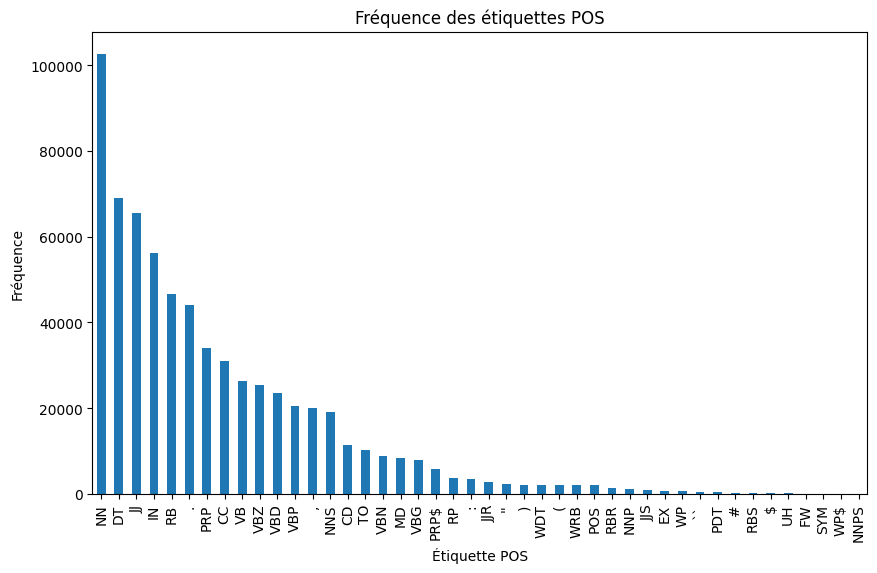

In [ ]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque étiquette POS
pos_tags_count = pd.Series(all_pos_tags).value_counts()
# Visualiser les résultats sous forme d'histogramme
plt.figure(figsize=(10, 6))
pos_tags_count.plot(kind='bar')
plt.title('Fréquence des étiquettes POS')
plt.xlabel('Étiquette POS')
plt.ylabel('Fréquence')
plt.show()


In [ ]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag


# Fonction pour extraire les noms et les adjectifs
def extract_nouns_and_adjectives(text):
    tokens = word_tokenize(str((text)))
    tagged_tokens = pos_tag(tokens)
    nouns = [word for word, tag in tagged_tokens if tag.startswith('NN')]
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    return nouns, adjectives

# Compter les occurrences de chaque mot
all_nouns = []
all_adjectives = []

for review_text in df_subset['Review Text']:
    nouns, adjectives = extract_nouns_and_adjectives(review_text)
    all_nouns.extend(nouns)
    all_adjectives.extend(adjectives)

# Sélectionner les 15 premiers noms et adjectifs les plus courants
common_nouns = Counter(all_nouns).most_common(15)
common_adjectives = Counter(all_adjectives).most_common(15)

# Afficher les résultats
print("Les 15 premiers noms les plus courants :")
print(common_nouns)
print("\nLes 15 premiers adjectifs les plus courants :")
print(common_adjectives)


Les 15 premiers noms les plus courants :
[('i', 13682), ('dress', 4114), ('size', 3640), ('color', 1921), ('fabric', 1915), ('fit', 1811), ('top', 1617), ('shirt', 1190), ('material', 1113), ('bit', 1108), ('length', 1070), ('sweater', 1031), ('colors', 1000), ('jeans', 957), ('quality', 930)]

Les 15 premiers adjectifs les plus courants :
[('i', 5236), ('great', 2501), ('small', 2008), ('top', 1457), ('little', 1448), ('soft', 1419), ('perfect', 1335), ('comfortable', 1257), ('nice', 1234), ('large', 1155), ('beautiful', 1090), ('cute', 849), ('other', 843), ('good', 810), ('much', 759)]
